In [1]:
%reload_kedro
catalog.list()

2022-06-29 16:26:21,992 - root - INFO - No path argument was provided. Using: C:\Users\155 X-MX\Projects\desafio_ds\kedro_desafio_ds
2022-06-29 16:26:22,312 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2022-06-29 16:26:22,472 - kedro.config.common - INFO - Config from path `C:\Users\155 X-MX\Projects\desafio_ds\kedro_desafio_ds\conf\local` will override the following existing top-level config keys: preprocessed_traffic, traffic
2022-06-29 16:26:22,482 - root - INFO - ** Kedro project Desafio DS Transito
2022-06-29 16:26:22,483 - root - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


['traffic', 'preprocessed_traffic', 'parameters']

## Reading Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
preprocessed_traffic = catalog.load('preprocessed_traffic')

2022-06-29 16:26:27,518 - kedro.io.data_catalog - INFO - Loading data from `preprocessed_traffic` (PickleDataSet)...


In [4]:
preprocessed_traffic.head(10)

,hour_coded,immobilized_bus,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,freight_occurrence,dangerous_freight_incident,lack_of_electricity,fire,point_of_flooding,manifestations,trolleybus_deffect,tree,semaphore_off,intermittent_semaphore,slowness_in_traffic
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.041
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.066
2,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.087
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.092
4,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.111
5,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.109
6,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.083
7,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.082
8,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.076
9,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.064


In [5]:
preprocessed_traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135 entries, 0 to 134
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   hour_coded                  135 non-null    int64  
 1   immobilized_bus             135 non-null    int64  
 2   broken_truck                135 non-null    int64  
 3   vehicle_excess              135 non-null    int64  
 4   accident_victim             135 non-null    int64  
 5   running_over                135 non-null    int64  
 6   fire_vehicles               135 non-null    int64  
 7   freight_occurrence          135 non-null    int64  
 8   dangerous_freight_incident  135 non-null    int64  
 9   lack_of_electricity         135 non-null    int64  
 10  fire                        135 non-null    int64  
 11  point_of_flooding           135 non-null    int64  
 12  manifestations              135 non-null    int64  
 13  trolleybus_deffect          135 non

In [6]:
preprocessed_traffic.describe()

,hour_coded,immobilized_bus,broken_truck,vehicle_excess,accident_victim,running_over,fire_vehicles,freight_occurrence,dangerous_freight_incident,lack_of_electricity,fire,point_of_flooding,manifestations,trolleybus_deffect,tree,semaphore_off,intermittent_semaphore,slowness_in_traffic
count,135.00000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000,135.000000
mean,14.00000,0.340741,0.874074,0.029630,0.422222,0.118519,0.007407,0.007407,0.007407,0.118519,0.007407,0.118519,0.051852,0.229630,0.044444,0.125926,0.014815,0.100519
std,7.81789,0.659749,1.102437,0.170195,0.696116,0.346665,0.086066,0.086066,0.086066,0.504485,0.086066,0.712907,0.222554,0.818998,0.206848,0.464077,0.121261,0.043632
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.034000
25%,7.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.074000
50%,14.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090000
75%,21.00000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.118500
max,27.00000,4.000000,5.000000,1.000000,3.000000,2.000000,1.000000,1.000000,1.000000,4.000000,1.000000,7.000000,1.000000,8.000000,1.000000,4.000000,1.000000,0.234000


In [7]:
#testando somar o total de ocorrências de duas variáveis quantitativas do dataset:
preprocessed_traffic[{'immobilized_bus', 'broken_truck'}].sum()

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\3219363018.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  preprocessed_traffic[{'immobilized_bus', 'broken_truck'}].sum()


immobilized_bus     46
broken_truck       118
dtype: int64

In [8]:
# total de ocorrências de todas as variáveis quantitativas do dataset durante o período analisado (exceto por slowness in traffic):
preprocessed_traffic.sum()

hour_coded                    1890.00
immobilized_bus                 46.00
broken_truck                   118.00
vehicle_excess                   4.00
accident_victim                 57.00
running_over                    16.00
fire_vehicles                    1.00
freight_occurrence               1.00
dangerous_freight_incident       1.00
lack_of_electricity             16.00
fire                             1.00
point_of_flooding               16.00
manifestations                   7.00
trolleybus_deffect              31.00
tree                             6.00
semaphore_off                   17.00
intermittent_semaphore           2.00
slowness_in_traffic             13.57
dtype: float64

In [9]:
columns_sum = preprocessed_traffic.sum()
columns_sum.sort_values()

dangerous_freight_incident       1.00
fire                             1.00
fire_vehicles                    1.00
freight_occurrence               1.00
intermittent_semaphore           2.00
vehicle_excess                   4.00
tree                             6.00
manifestations                   7.00
slowness_in_traffic             13.57
lack_of_electricity             16.00
point_of_flooding               16.00
running_over                    16.00
semaphore_off                   17.00
trolleybus_deffect              31.00
immobilized_bus                 46.00
accident_victim                 57.00
broken_truck                   118.00
hour_coded                    1890.00
dtype: float64

In [11]:
total_occurrences = columns_sum.drop(index=["hour_coded", "vehicle_excess", "freight_occurrence", "dangerous_freight_incident", "fire", "slowness_in_traffic"])

# Abaixo temos o somatório de todas as ocorrências ordenados por variável;
# Percebe-se como 'broken_truck' foi o evento mais observado, seguido por 'accident_victim' e 'immobilized_bus';

total_occurrences.sort_values(ascending=False)

broken_truck              118.0
accident_victim            57.0
immobilized_bus            46.0
trolleybus_deffect         31.0
semaphore_off              17.0
running_over               16.0
lack_of_electricity        16.0
point_of_flooding          16.0
manifestations              7.0
tree                        6.0
intermittent_semaphore      2.0
fire_vehicles               1.0
dtype: float64

In [12]:
# Esse código traz a média de lentidão no tráfego a cada intervalo de 30 minutos;
# Até poderíamos colocar os dados em ordem numérica, mas isso não faria sentido pois estamos analisando uma série temporal;
hour_slowness_graph_data = preprocessed_traffic[{'hour_coded', 'slowness_in_traffic'}].groupby('hour_coded').mean().reset_index()
hour_slowness_graph_data

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\1262410283.py:3: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hour_slowness_graph_data = preprocessed_traffic[{'hour_coded', 'slowness_in_traffic'}].groupby('hour_coded').mean().reset_index()


,hour_coded,slowness_in_traffic
0,1,0.0396
1,2,0.0534
2,3,0.0664
3,4,0.0732
4,5,0.0902
5,6,0.0888
6,7,0.0802
7,8,0.0786
8,9,0.0818
9,10,0.0852


<AxesSubplot:xlabel='hour_coded', ylabel='slowness_in_traffic'>

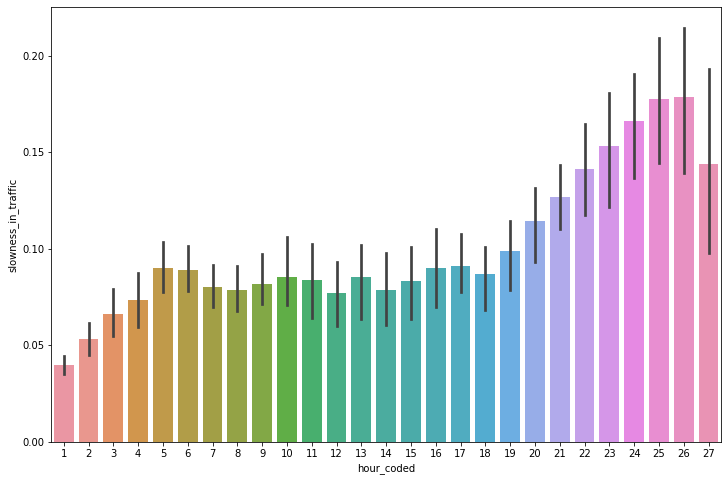

In [13]:
f,ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'hour_coded', y = 'slowness_in_traffic', data = preprocessed_traffic)

<AxesSubplot:xlabel='hour_coded', ylabel='slowness_in_traffic'>

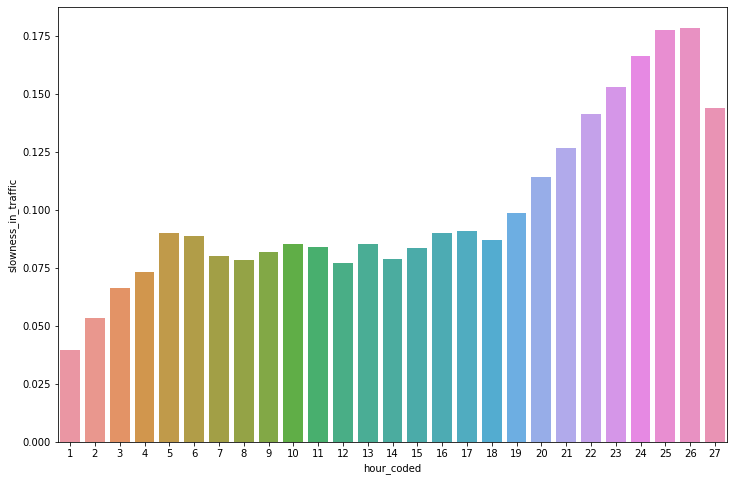

In [14]:
f,ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'hour_coded', y = 'slowness_in_traffic', data = hour_slowness_graph_data)

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\1586418326.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hour_broken_truck_graph_data = preprocessed_traffic[{'hour_coded', 'broken_truck'}].groupby('hour_coded').mean().reset_index()


<AxesSubplot:xlabel='hour_coded', ylabel='broken_truck'>

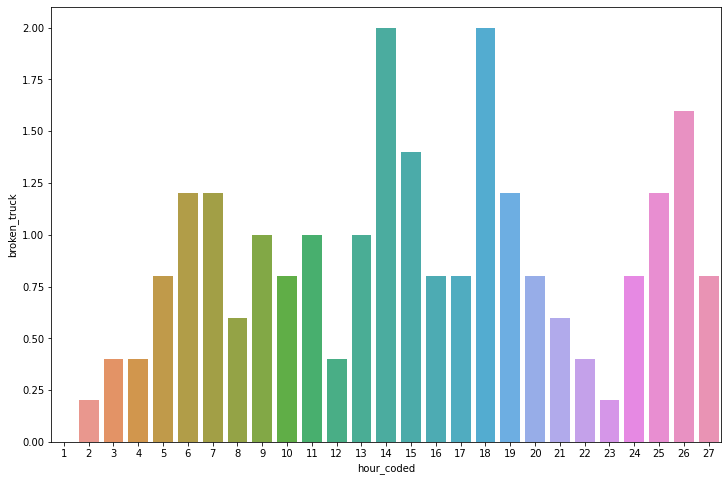

In [15]:
hour_broken_truck_graph_data = preprocessed_traffic[{'hour_coded', 'broken_truck'}].groupby('hour_coded').mean().reset_index()
f,ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'hour_coded', y = 'broken_truck', data = hour_broken_truck_graph_data)

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\825879886.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  hour_accident_victim_graph_data = preprocessed_traffic[{'hour_coded', 'accident_victim'}].groupby('hour_coded').mean().reset_index()


<AxesSubplot:xlabel='hour_coded', ylabel='accident_victim'>

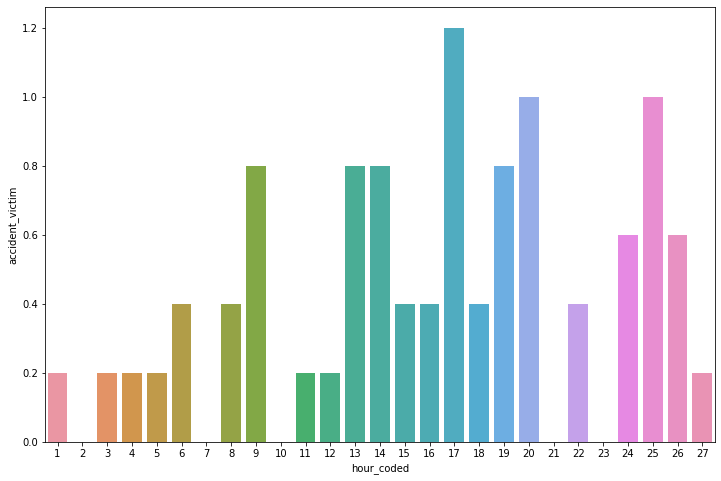

In [16]:
hour_accident_victim_graph_data = preprocessed_traffic[{'hour_coded', 'accident_victim'}].groupby('hour_coded').mean().reset_index()
f,ax = plt.subplots(figsize=(12, 8))
sns.barplot(x = 'hour_coded', y = 'accident_victim', data = hour_accident_victim_graph_data)

In [17]:
#Testando a correlação entre duas variáveis dentro do dataset:
preprocessed_traffic[{'broken_truck', 'slowness_in_traffic'}].corr()

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\1631968593.py:2: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  preprocessed_traffic[{'broken_truck', 'slowness_in_traffic'}].corr()


,slowness_in_traffic,broken_truck
slowness_in_traffic,1.000000,0.131998
broken_truck,0.131998,1.000000


In [20]:
preprocessed_traffic[{'immobilized_bus', 'slowness_in_traffic'}].corr()

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\2993879006.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  preprocessed_traffic[{'immobilized_bus', 'slowness_in_traffic'}].corr()


,slowness_in_traffic,immobilized_bus
slowness_in_traffic,1.000000,0.101143
immobilized_bus,0.101143,1.000000


In [21]:
preprocessed_traffic[{'hour_coded', 'slowness_in_traffic'}].corr()

C:\Users\155 X-MX\AppData\Local\Temp\ipykernel_20316\811868015.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  preprocessed_traffic[{'hour_coded', 'slowness_in_traffic'}].corr()


,slowness_in_traffic,hour_coded
slowness_in_traffic,1.000000,0.729962
hour_coded,0.729962,1.000000


Aqui percebemos que o horário é a variável que melhor prevê a lentidão no trânsito